**PROJECT TEAM ID**:  PTID-CDS-NOV-23-1686    
**PROJECT CODE**   :  PRCP-1002-HandwrittenDigits      
**PROJECT NAME**   :  Handwritten Digits Image Processing Dataset      

# Business Case:

* In this project, we aim to perform a comprehensive analysis on a handwritten digits dataset using machine learning techniques.       

* The dataset comprises a collection of hand-drawn numerical digits, each represented as an image. Our primary objectives include data preprocessing, feature extraction, and the implementation of machine learning algorithms to accurately classify and predict the handwritten digits.    

* We will explore various models such as support vector machines, neural networks, and decision trees to identify the most effective approach for this specific dataset. Additionally, we plan to assess model performance through metrics such as accuracy, precision, and recall.   

* The project will not only focus on achieving high classification accuracy but also on gaining insights into the factors influencing model performance. This analysis will contribute to a better understanding of the capabilities and limitations of different machine learning approaches when applied to handwritten digit recognition tasks.   

* The MNIST dataset can be immediately applied to a wide range of industries and business processes due to its focus on recognition of handwritten digits. By utilizing MNIST-based solutions, jobs involving handwritten numbers can be completed more quickly, accurately, and automatically, which will eventually increase customer satisfaction and corporate operations.
        Every day, DigitsBank, a financial institution, gets a sizable number of checks. These checks must be manually handled, which takes time and is prone to error. DigitsBank uses machine learning models trained on the MNIST handwritten digits dataset to construct an automated check processing system with the goals of increasing efficiency, decreasing errors, and improving customer experience.Utilizing the MNIST handwritten digits dataset for automated check processing is a calculated decision made by DigitsBank in an effort to modernize processes, cut expenses, and improve customer satisfaction. By incorporating machine learning technologies, DigitsBank demonstrates its dedication to utilizing cutting-edge solutions to better business outcomes and establishes itself as a creative player in the financial sector.

In [3]:
# Importing Basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
import tensorflow as tf
from tensorflow.keras import datasets
from keras.utils import to_categorical
from keras import layers,Sequential
from keras.layers import Flatten,Dense
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, f1_score, precision_score

In [5]:
(x,y), (x_test,y_test)= datasets.mnist.load_data()

In [6]:
print(x.shape)
print(y.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


# Exploratory Data Analysis(EDA)

##### Image Size:

Each image in the MNIST dataset is a grayscale image of size 28x28 pixels.

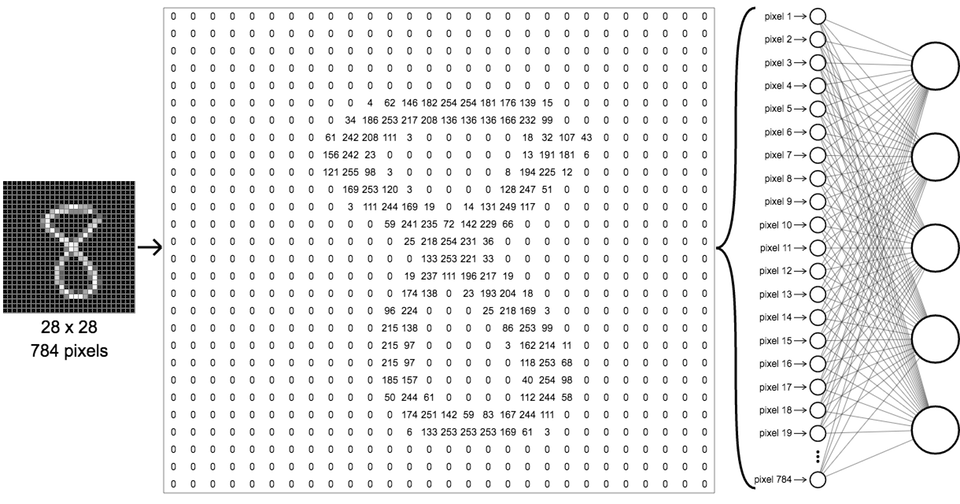

##### Digits:

The dataset consists of handwritten digits from 0 to 9. Each digit has a corresponding label.

![hello baby](https://inteldig.com/wp-content/uploads/2018/05/numeros.png)

#### Number of Samples:

MNIST traditionally consists of 60,000 training images and 10,000 testing images. Each digit class has an equal number of samples in the training set.

#### Grayscale Images:

The images are in grayscale, meaning they only have shades of black and white. The pixel values range from 0 to 255, where 0 represents black and 255 represents white.
![hii](https://tse3.mm.bing.net/th?id=OIP.K4pxYLE0yZ6ywzJpC_JD5wHaC0&pid=Api&P=0&h=180)

##### Preprocessing the data

In [7]:
x = x.reshape((x.shape[0], 28, 28, 1)) # reshaping the data
x = x.astype('float32') / 255.0  # Normalizing the data between 0 and 1

In [8]:
x.shape

(60000, 28, 28, 1)

0
1
8
4
1


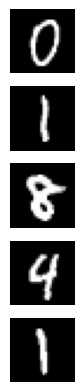

In [9]:
plt.figure(figsize=(100,100))
plt_num = 1
for i in range(1000,4000,700):
    plt.subplot(100,1,plt_num)
    plt.imshow(x[i], cmap= 'gray')
    print(y[i])
    plt.axis('off')
    plt_num += 1
    

In [10]:
y = to_categorical(y) # converting to one hot encoding

In [11]:
# Split the dataset into training and validation sets
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
model = Sequential()

In [13]:
#  Building the CNN Model
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='softmax'))


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [15]:
model.compile(optimizer='adam',loss= 'categorical_crossentropy', metrics='accuracy')

In [16]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [17]:
model.fit(x_train, y_train, batch_size=64, epochs=100,validation_data=(x_valid,y_valid),callbacks=[early_stopping], verbose=1)

Epoch 1/100


750/750 [==============================] - 14s 17ms/step - loss: 0.2443 - accuracy: 0.9247 - val_loss: 0.0773 - val_accuracy: 0.9780
Epoch 2/100
750/750 [==============================] - 12s 16ms/step - loss: 0.0828 - accuracy: 0.9749 - val_loss: 0.0502 - val_accuracy: 0.9864
Epoch 3/100
750/750 [==============================] - 12s 16ms/step - loss: 0.0599 - accuracy: 0.9814 - val_loss: 0.0533 - val_accuracy: 0.9858
Epoch 4/100
750/750 [==============================] - 12s 16ms/step - loss: 0.0509 - accuracy: 0.9838 - val_loss: 0.0349 - val_accuracy: 0.9896
Epoch 5/100
750/750 [==============================] - 12s 17ms/step - loss: 0.0412 - accuracy: 0.9870 - val_loss: 0.0309 - val_accuracy: 0.9902
Epoch 6/100
750/750 [==============================] - 13s 17ms/step - loss: 0.0354 - accuracy: 0.9889 - val_loss: 0.0329 - val_accuracy: 0.9901
Epoch 7/100
750/750 [==============================] - 12s 16ms/step - loss: 0.0310 - accuracy: 0.9900 - val_loss: 0.0372 - val_

In [18]:
# Evaluating the model on validation data
valid_predictions = model.predict(x_valid)

375/375 [==============================] - 2s 4ms/step


In [19]:
valid_predictions_classes = np.argmax(valid_predictions, axis=1)

In [20]:
y_valid_classes = np.argmax(y_valid, axis=1)

In [21]:
valid_accuracy = accuracy_score(y_valid_classes, valid_predictions_classes)
print("Validation Accuracy:", valid_accuracy)

Validation Accuracy: 0.99025


In [22]:
print(classification_report(y_valid_classes, valid_predictions_classes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1175
           1       1.00      1.00      1.00      1322
           2       0.98      1.00      0.99      1174
           3       1.00      0.99      0.99      1219
           4       0.98      0.99      0.99      1176
           5       0.99      0.98      0.99      1104
           6       0.99      0.99      0.99      1177
           7       0.99      0.99      0.99      1299
           8       0.99      0.99      0.99      1160
           9       0.99      0.98      0.99      1194

    accuracy                           0.99     12000
   macro avg       0.99      0.99      0.99     12000
weighted avg       0.99      0.99      0.99     12000



# Classification by using Machine learning Algorithms

In [23]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score,f1_score,precision_score,recall_score

In [24]:
# Importing the dataset from sklearn
digits = datasets.load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [25]:
x = digits.data
y = digits.target

In [26]:
# Splitting the data into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Model Creation by using Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lr= LogisticRegression()

In [29]:
lr.fit(x_train,y_train)

LogisticRegression()

In [30]:
y_pred_lr =lr.predict(x_test)

In [31]:
y_pred_lr_train = lr.predict(x_train)

### Model Evaluation 

In [32]:
accuracy_score(y_test,y_pred_lr)

0.9694444444444444

In [35]:
print(f"Logistic_Regression Accuracy Score test data :{accuracy_score(y_test,y_pred_lr)}")
print(f"Logistic_Regression Accuracy Score train data :{accuracy_score(y_train,y_pred_lr_train)}")

Logistic_Regression Accuracy Score test data :0.9694444444444444
Logistic_Regression Accuracy Score train data :1.0


In [37]:
print(f"Logistic_Regression classification report for test data :{classification_report(y_test,y_pred_lr)}")
print(f"Logistic_Regression classification report for train data :{classification_report(y_train,y_pred_lr_train)}")

Logistic_Regression classification report for test data :              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       1.00      0.96      0.98        46
           5       0.92      0.94      0.93        47
           6       0.94      0.97      0.96        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

Logistic_Regression classification report for train data :              precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
           1     

## Model Creation By Using KNN Classifier

In [38]:
knn = KNeighborsClassifier()

In [39]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [40]:
y_pred_knn = knn.predict(x_test)

In [41]:
y_pred_knn_train = knn.predict(x_train)

### Model Evaluation KNN - Classifier

In [42]:
accuracy_score(y_test,y_pred_knn)

0.9861111111111112

In [43]:
accuracy_score(y_train, y_pred_knn_train)

0.9895615866388309

In [44]:
# classification report for test data 
print(f"KNN Classifier--classification_report for test data:---\n{classification_report(y_test,y_pred_knn)}")
# classification report for train  data 
print(f"KNN Classifier--classification_report for train data:---\n{classification_report(y_train, y_pred_knn_train)}")

KNN Classifier--classification_report for test data:---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       0.98      1.00      0.99        46
           5       0.98      0.96      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      1.00      1.00        30
           9       0.95      0.95      0.95        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

KNN Classifier--classification_report for train data:---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
           1       

## Model Creation by Using SVM - Classifier

In [45]:
svc = SVC()

In [46]:
svc.fit(x_train, y_train)

SVC()

In [47]:
y_pred_svc = svc.predict(x_test)

In [48]:
y_pred_svc_train = svc.predict(x_train)

### Model Evaluation SVM - classifier

In [49]:
accuracy_score(y_test,y_pred_svc)

0.9861111111111112

In [50]:
accuracy_score(y_train,y_pred_svc_train)

0.9965205288796103

In [51]:
# classification report for test data 
print(f"SVM - Classifier--classification_report for test data:---\n{classification_report(y_test,y_pred_svc)}")
# classification report for train data 
print(f"SVM - Classifier--classification_report for train data:---\n{classification_report(y_train, y_pred_svc_train)}")

SVM - Classifier--classification_report for test data:---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.95      0.95        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

SVM - Classifier--classification_report for train data:---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
           1   

## Model Creation By Using Decision Tree Classifier

In [52]:
dtc = DecisionTreeClassifier()

In [53]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [54]:
y_pred_dtc= dtc.predict(x_test)

In [55]:
y_pred_dtc_train=dtc.predict(x_train)

#### Model Evaluation Decision Tree

In [56]:
accuracy_score(y_test,y_pred_dtc)

0.8666666666666667

In [57]:
accuracy_score(y_train,y_pred_dtc_train)

1.0

In [58]:
# classification report for test data 
print(f"decision Tree - Classifier--classification_report for test data:---\n{classification_report(y_test,y_pred_dtc)}")
# classification report for train data 
print(f"Decision Tree - Classifier--classification_report for train data:---\n{classification_report(y_train, y_pred_dtc_train)}")

decision Tree - Classifier--classification_report for test data:---
              precision    recall  f1-score   support

           0       0.97      0.88      0.92        33
           1       0.91      0.75      0.82        28
           2       0.90      0.82      0.86        33
           3       0.72      0.85      0.78        34
           4       0.79      0.91      0.85        46
           5       0.96      0.96      0.96        47
           6       0.92      1.00      0.96        35
           7       0.83      0.88      0.86        34
           8       0.88      0.70      0.78        30
           9       0.85      0.82      0.84        40

    accuracy                           0.87       360
   macro avg       0.87      0.86      0.86       360
weighted avg       0.87      0.87      0.87       360

Decision Tree - Classifier--classification_report for train data:---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      

## Hyperparameter Tuning

In [59]:
dt_param_grid = {'max_depth': [None, 10, 20, 30],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}

In [60]:
dt_grid_search = GridSearchCV(dtc, dt_param_grid, cv=5, scoring='accuracy')


In [61]:
dt_grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [62]:
dt_grid_search.best_params_

{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [63]:
dt_best_model = dt_grid_search.best_estimator_

In [64]:
dt_pred = dt_best_model.predict(x_test)
dt_pred_train  = dt_best_model.predict(x_train )

### Model Evaluation Decision Tree

In [65]:
accuracy_score(y_test,dt_pred)

0.8555555555555555

In [66]:
accuracy_score(y_train,dt_pred_train)

1.0

In [67]:
# classification report for test data after hyperparameter Tuning
print(f"decision Tree - Classifier--classification_report for test data:---\n{classification_report(y_test,dt_pred)}")
# classification report for train data 
print(f"decision Tree - Classifier--classification_report for train data:---\n{classification_report(y_train,dt_pred_train)}")

decision Tree - Classifier--classification_report for test data:---
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        33
           1       0.81      0.79      0.80        28
           2       0.93      0.82      0.87        33
           3       0.71      0.88      0.79        34
           4       0.76      0.89      0.82        46
           5       0.92      0.94      0.93        47
           6       0.97      0.91      0.94        35
           7       0.86      0.88      0.87        34
           8       0.80      0.67      0.73        30
           9       0.87      0.82      0.85        40

    accuracy                           0.86       360
   macro avg       0.86      0.85      0.85       360
weighted avg       0.86      0.86      0.86       360

decision Tree - Classifier--classification_report for train data:---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      

## Model creation by using Random Forest Classifier

In [68]:
rfc=RandomForestClassifier()

In [69]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [70]:
y_pred_rfc=rfc.predict(x_test)

In [71]:
y_pred_rfc_train = rfc.predict(x_train)

## Model Evaluation Random Forest Classifier

In [72]:
accuracy_score(y_test,y_pred_rfc)

0.975

In [73]:
accuracy_score(y_train,y_pred_rfc_train)

1.0

In [74]:
# classification report for test data 
print(f"Random forest - Classifier--classification_report for test data:---\n{classification_report(y_test,y_pred_rfc)}")
# classification report for train data 
print(f"Random forest - Classifier--classification_report for train data:---\n{classification_report(y_train, y_pred_rfc_train)}")

Random forest - Classifier--classification_report for test data:---
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       0.98      0.98      0.98        46
           5       0.94      0.98      0.96        47
           6       0.97      0.97      0.97        35
           7       0.94      0.97      0.96        34
           8       1.00      0.97      0.98        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.98       360

Random forest - Classifier--classification_report for train data:---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      

## HyperParameter tuning

In [75]:
rf_param_grid = {'n_estimators': [50, 100, 200],
                 'max_depth': [None, 10, 20, 30],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}
rf_grid_search = GridSearchCV(rfc, rf_param_grid, cv=5, scoring='accuracy')



In [76]:
rf_grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [77]:
rf_best_model = rf_grid_search.best_estimator_
rf_pred = rf_best_model.predict(x_test)
rf_pred_train = rf_best_model.predict(x_train)

## Model Evaluation Random Forest Classifier`

In [78]:
print(accuracy_score(y_test,rf_pred))
print(accuracy_score(y_train,rf_pred_train))

0.975
1.0


In [79]:
# classification report for test data after Hyperparameter Tuning
print(f"Random forest - Classifier--classification_report for test data:---\n{classification_report(y_test,rf_pred)}")
# classification report for train data after Hyperparameter Tuning
print(f"Random forest - Classifier--classification_report for train data:---\n{classification_report(y_train, y_pred_rfc_train)}")

Random forest - Classifier--classification_report for test data:---
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       0.98      1.00      0.99        46
           5       0.94      0.98      0.96        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.93      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.98       360
weighted avg       0.98      0.97      0.98       360

Random forest - Classifier--classification_report for train data:---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      

## Model Creation by using Xgboost Classifier

In [80]:
xgc = XGBClassifier()

In [81]:
xgc.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [82]:
y_pred_xgc = xgc.predict(x_test)

In [83]:
y_pred_xgc_train= xgc.predict(x_train)

## Model Evaluation XGBoost Classifier

In [84]:
accuracy_score(y_test,y_pred_xgc)

0.9694444444444444

In [85]:
accuracy_score(y_train,y_pred_xgc_train)

1.0

In [86]:
# classification report for test data 
print(f"XgBoost - Classifier--classification_report for test data:---\n{classification_report(y_test,y_pred_xgc)}")
# classification report for train data 
print(f"XgBoost Classifier--classification_report for train data:---\n{classification_report(y_train, y_pred_xgc_train)}")

XgBoost - Classifier--classification_report for test data:---
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        33
           3       1.00      0.94      0.97        34
           4       0.98      0.98      0.98        46
           5       0.94      0.98      0.96        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.93      0.93      0.93        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

XgBoost Classifier--classification_report for train data:---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
         

## Hyperparameter Tuning

In [87]:
xgb_param_grid = {'n_estimators': [50, 100, 200],
                  'max_depth': [3, 5, 7],
                  'learning_rate': [0.01, 0.1, 0.2]}
xgb_grid_search = GridSearchCV(xgc, xgb_param_grid, cv=5, scoring='accuracy')


In [88]:
xgb_grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='multi:softprob', ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [89]:
xgb_best_model = xgb_grid_search.best_estimator_
xgb_pred = xgb_best_model.predict(x_test)
xgb_pred_train = xgb_best_model.predict(x_train)

## Model Evaluation XGBoost Classifier

In [90]:
print(accuracy_score(y_test,xgb_pred))
print(accuracy_score(y_train,xgb_pred_train))

0.9694444444444444
1.0


In [91]:
# classification report for test data after Hyperparameter Tuning
print(f"XgBoost - Classifier--classification_report for test data:---\n{classification_report(y_test, xgb_pred)}")
# classification report for train data after Hyperparameter Tuning
print(f"XgBoost - Classifier--classification_report for train data:---\n{classification_report(y_train, xgb_pred_train)}")

XgBoost - Classifier--classification_report for test data:---
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       1.00      0.96      0.98        28
           2       0.97      1.00      0.99        33
           3       1.00      0.97      0.99        34
           4       0.98      1.00      0.99        46
           5       0.94      0.96      0.95        47
           6       0.97      0.94      0.96        35
           7       0.97      0.97      0.97        34
           8       0.94      0.97      0.95        30
           9       0.95      0.95      0.95        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

XgBoost - Classifier--classification_report for train data:---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
       

## Conclusions:

#### CNN Model:

Accuracy_score : 0.99025
    
#### LogisticRegression Model:

Accuracy_score : 0.9694444444444444

#### K Nearest Neighbors Classifier Model:

Accuracy_score : 0.9861111111111112
    
#### SVM Classifier Model:
    
Accuracy_score : 0.9861111111111112
    
#### Decision Tree Classifier Model:

Accuracy_score : 0.8555555555555555
  
#### Random Forest Classifier Model:

Accuracy_score : 0.975

#### Extreme Gradient Boosting Classifier Model:

Accuracy_score : 0.96944

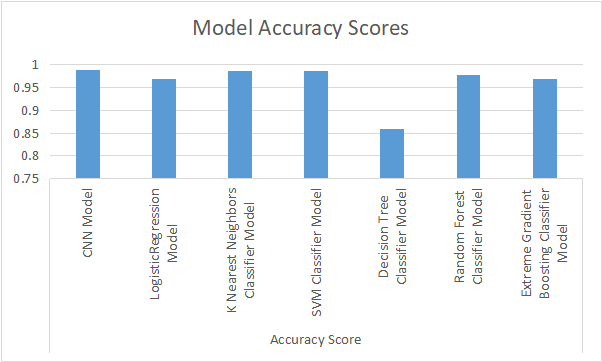


 * Based on the accuracy scores, the CNN (Convolutional Neural Network) model achieved the highest accuracy of 0.9895,         making it the best-performing model among the ones listed.
 * CNNs are particularly effective for image classification tasks, and in this context, they have demonstrated superior       performance compared to other models in the evaluation.

Therefore, if accuracy is the primary metric for model selection, the CNN model should be considered as the best model for the given dataset and task. There can be also other factors, such as model interpretability, computational complexity, and training time, may also influence the choice of the best model depending on the specific requirements of the application.